# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation

In [2]:
df1=pd.read_csv("D:\\Learnings\\Masters_TUD\\Dissertation\\Datasets\\Kaggle\\malicious_phish.csv")

In [3]:
df1.shape

(651191, 2)

In [4]:
df2_phish=pd.read_csv("D:\\Learnings\\Masters_TUD\\Dissertation\\Datasets\\Mendeley\\Phishing URLs.csv")

In [5]:
df2_mixed=pd.read_csv("D:\\Learnings\\Masters_TUD\\Dissertation\\Datasets\\Mendeley\\URL dataset.csv")

In [6]:
df2=pd.concat([df2_phish,df2_mixed])

In [7]:
df2.shape

(609421, 2)

In [8]:
df_main=pd.concat([df1,df2])

In [9]:
df_main.shape

(1260612, 2)

In [10]:
df_main = df_main.drop_duplicates()

In [11]:
df_main.shape

(1144961, 2)

In [12]:
df_main['type'].value_counts()

type
benign        773818
phishing      252190
defacement     95308
malware        23645
Name: count, dtype: int64

In [13]:
df_main = df_main[~df_main['type'].isin(['defacement', 'malware'])]

In [15]:
df_main.shape

(1026008, 2)

In [16]:
df_main = df_main[~df_main['url'].str.contains('bitly|tinyurl', case=False, na=False)]

In [17]:
df_main['url'] = df_main['url'].str.strip("'")

In [18]:
df_main.shape

(1025020, 2)

In [19]:
df_main['type'].value_counts()

type
benign      773707
phishing    251313
Name: count, dtype: int64

## Dataset Filtering

In [ ]:
# Choosing only 400k URLs from original 1000k dataset 
def sample_data(df, phishing_size, benign_size):
    phishing_samples = df[df['type'] == 1].sample(n=phishing_size, random_state=42)
    benign_samples = df[df['type'] == 0].sample(n=benign_size, random_state=42)
    return pd.concat([phishing_samples, benign_samples]).sample(frac=1).reset_index(drop=True)

In [ ]:
sampled_df_400k = sample_data(df_main, phishing_size=210000, benign_size=210000)

## inclusion of Open phish data

In [ ]:
df3=pd.read_csv("D:\\Learnings\\Masters_TUD\\Dissertation\\Datasets\\OpenPhish\\openPhish.csv")

In [ ]:
sampled_df_400k=pd.concat([sampled_df_400k, df3])

In [20]:
sampled_df_400k.shape

(422000, 2)


## Saving final dataset

In [ ]:
sampled_df_400k.to_csv("D:\\Learnings\\Masters_TUD\\Dissertation\\Datasets\\S_BERT_Phishing_Dataset.csv", index=False)

In [14]:
import matplotlib.pyplot as plt

df_visual = df.drop(columns=['url', 'type','embeddings'])

plt.figure(figsize=(14, 12))
sns.heatmap(df_visual.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

NameError: name 'df' is not defined

In [70]:
import pandas as pd

# Step 2: Define the bins (ranges) for URL lengths
bins = [0,10, 30, 50, 100, 200, 300, 400, 500, 1000, float('inf')]
labels = ['0-10','10-30','30-50', '51-100', '101-200', '201-300', '301-400', '401-500', '501-1000', '1001+']

# Step 3: Categorize the URLs into the defined bins
df['url_length_range'] = pd.cut(df['url_length'], bins=bins, labels=labels)

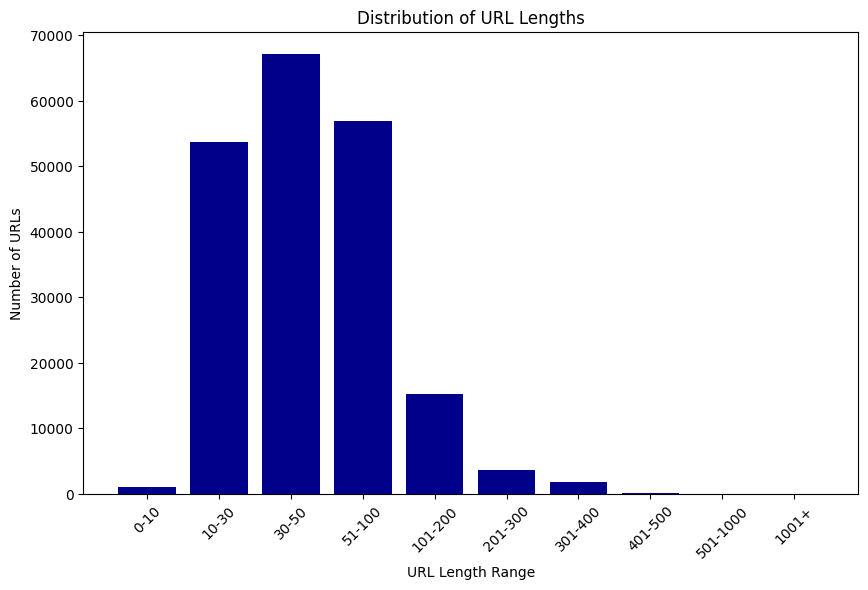

In [71]:
import matplotlib.pyplot as plt

# Step 4: Count the number of URLs in each range
url_length_distribution = df['url_length_range'].value_counts().sort_index()

# Step 5: Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(url_length_distribution.index, url_length_distribution.values, color='darkblue')
plt.title('Distribution of URL Lengths')
plt.xlabel('URL Length Range')
plt.ylabel('Number of URLs')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [23]:
# checking for information and null values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906598 entries, 0 to 906597
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   url                       906598 non-null  object
 1   type                      906598 non-null  int32 
 2   url_length                906598 non-null  int64 
 3   domain_length             906598 non-null  int64 
 4   path_length               906598 non-null  int64 
 5   num_subdomains            906598 non-null  int64 
 6   subdomain_length          906598 non-null  int64 
 7   path_depth                906598 non-null  int64 
 8   has_file_extension        906598 non-null  int64 
 9   equal_count               906598 non-null  int64 
 10  redirects                 906598 non-null  int64 
 11  query_param_count         906598 non-null  int64 
 12  dot_char_count            906598 non-null  int64 
 13  hyphen_char_count         906598 non-null  int64 
 14  tld_

In [ ]:
def objective(trial):
  # Determine the hyperperatemers and their value ranges
  learning_rate = trial.suggest_float("learning_rate", 0.01, 0.1)
  num_leaves = trial.suggest_int("num_leaves", 2, 256)
  max_depth = trial.suggest_int("max_depth", -1, 50)
  min_child_samples = trial.suggest_int("min_child_samples", 5, 100)
  subsample = trial.suggest_float("subsample", 0.5, 1.0)
  colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)
  n_estimators = trial.suggest_int("n_estimators", 100, 1000)
  
  # Create and train the model
  model = LGBMClassifier(
  learning_rate=learning_rate,
  num_leaves=num_leaves,
  max_depth=max_depth,
  min_child_samples=min_child_samples,
  subsample=subsample,
  colsample_bytree=colsample_bytree,
  n_estimators=n_estimators,
  random_state=42
  )
  model.fit(X_train, y_train)
  
  # Evaluate model and return the metric
  clf_lgbm_pred = model.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, clf_lgbm_pred)
  return accuracy

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
print("Best trial:")
print(" Value: {}".format(study.best_trial.value))
print(" Params: {}".format(study.best_trial.params))